In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
from sklearn import svm
import statsmodels.api as sm
import scipy as st
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('/kaggle/input/online-shoppers-intention/online_shoppers_intention.csv')
df.shape

(12330, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,2.124211,2.357804,3.153298,4.073904
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,0.906823,1.710114,2.402340,4.016654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [10]:
df.describe(include=['O'])

,Month,VisitorType
count,12205,12205
unique,10,3
top,May,Returning_Visitor
freq,3329,10431


In [11]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [12]:
df['VisitorType'].value_counts()

Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: VisitorType, dtype: int64

In [13]:
df['VisitorType']=df['VisitorType'].map({'Returning_Visitor':1,'New_Visitor':2,'Other':2})

In [14]:
df['VisitorType']

0        1
1        1
2        1
3        1
4        1
        ..
12325    1
12326    1
12327    1
12328    1
12329    2
Name: VisitorType, Length: 12205, dtype: int64

In [15]:
cat=['SpecialDay','Month','OperatingSystems','Revenue','Weekend','VisitorType','Region',"Informational",'Browser']
num=['Administrative','Administrative_Duration','Informational_Duration','ProductRelated',
    'ProductRelated_Duration','BounceRates','ExitRates','PageValues',]

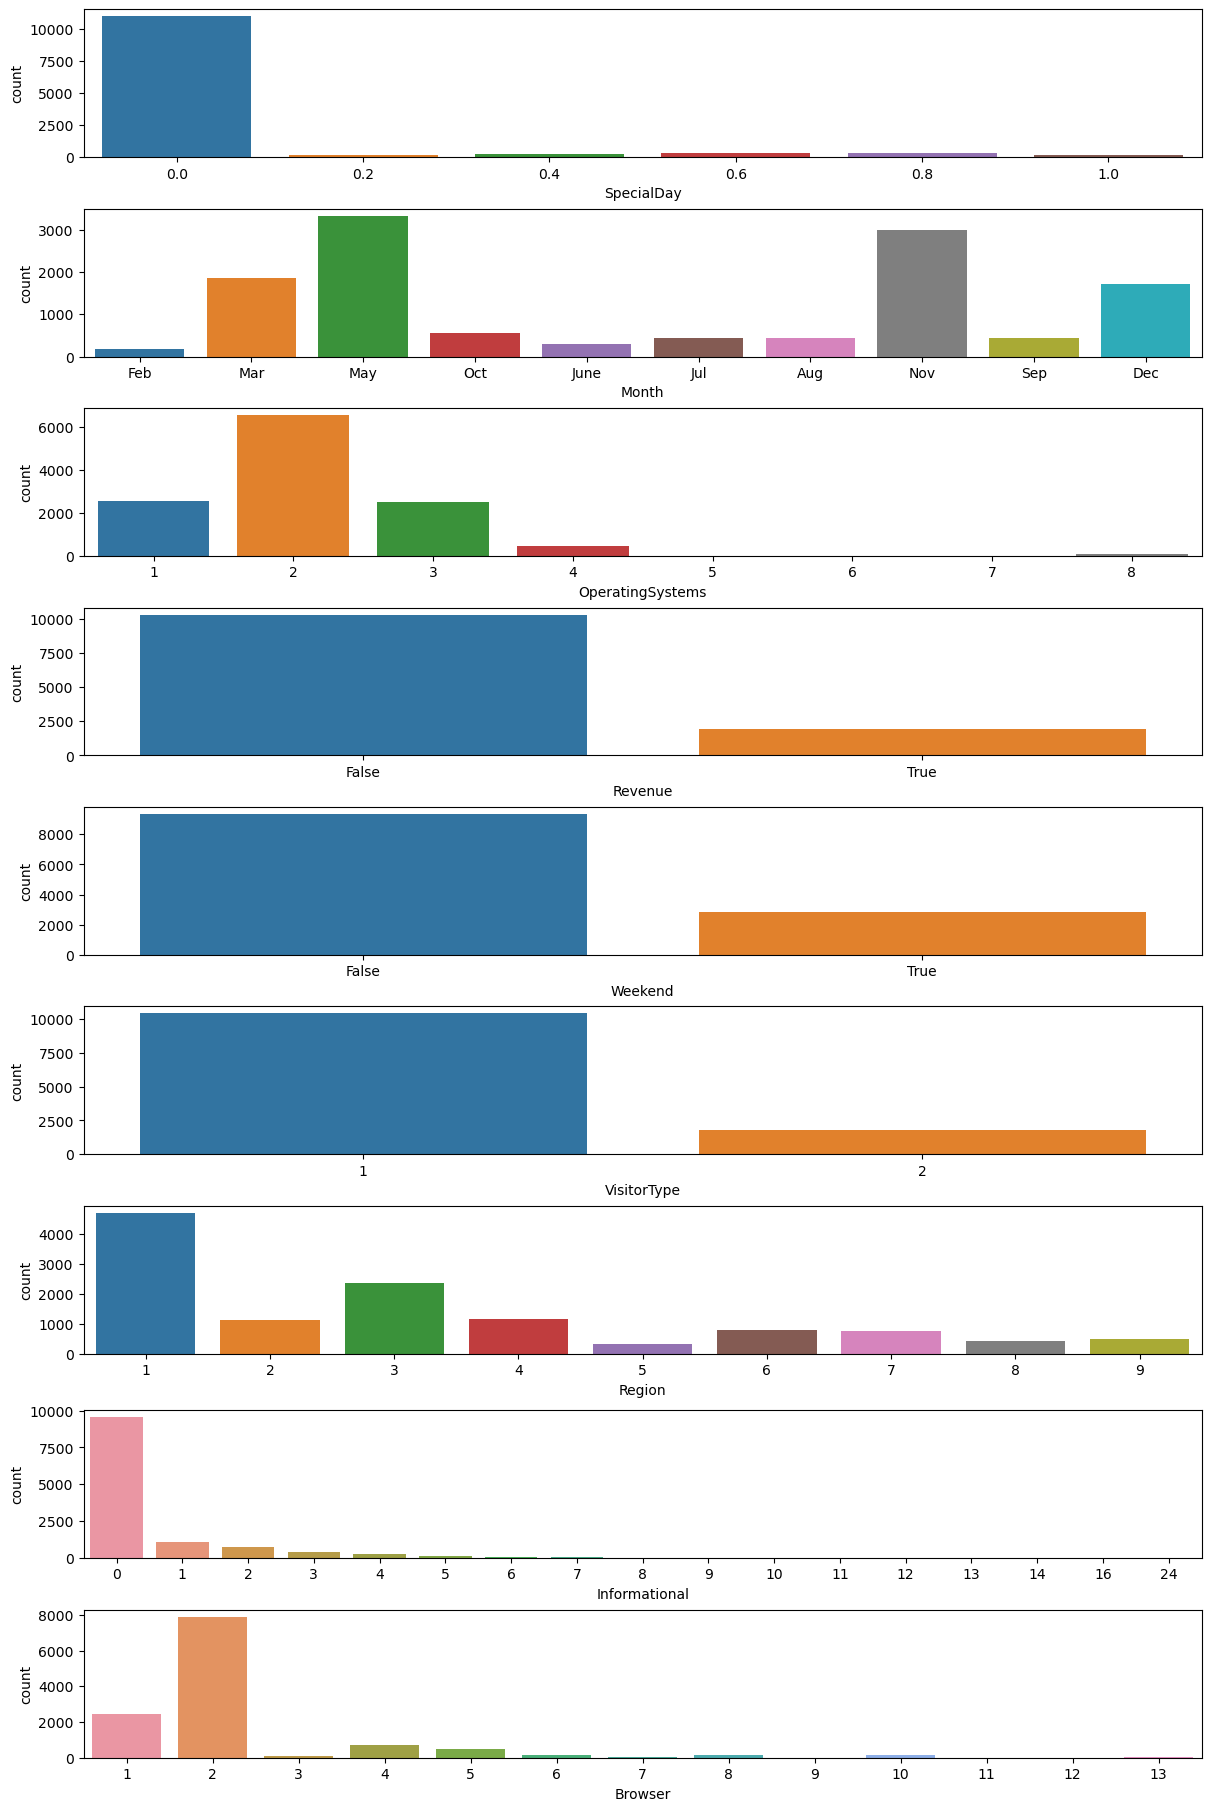

In [16]:
count=0
fig,ax=plt.subplots(len(cat),constrained_layout=True,figsize=(12,18))
for i in cat:
    sns.countplot(x=i,data=df,ax=ax[count])
    count+=1

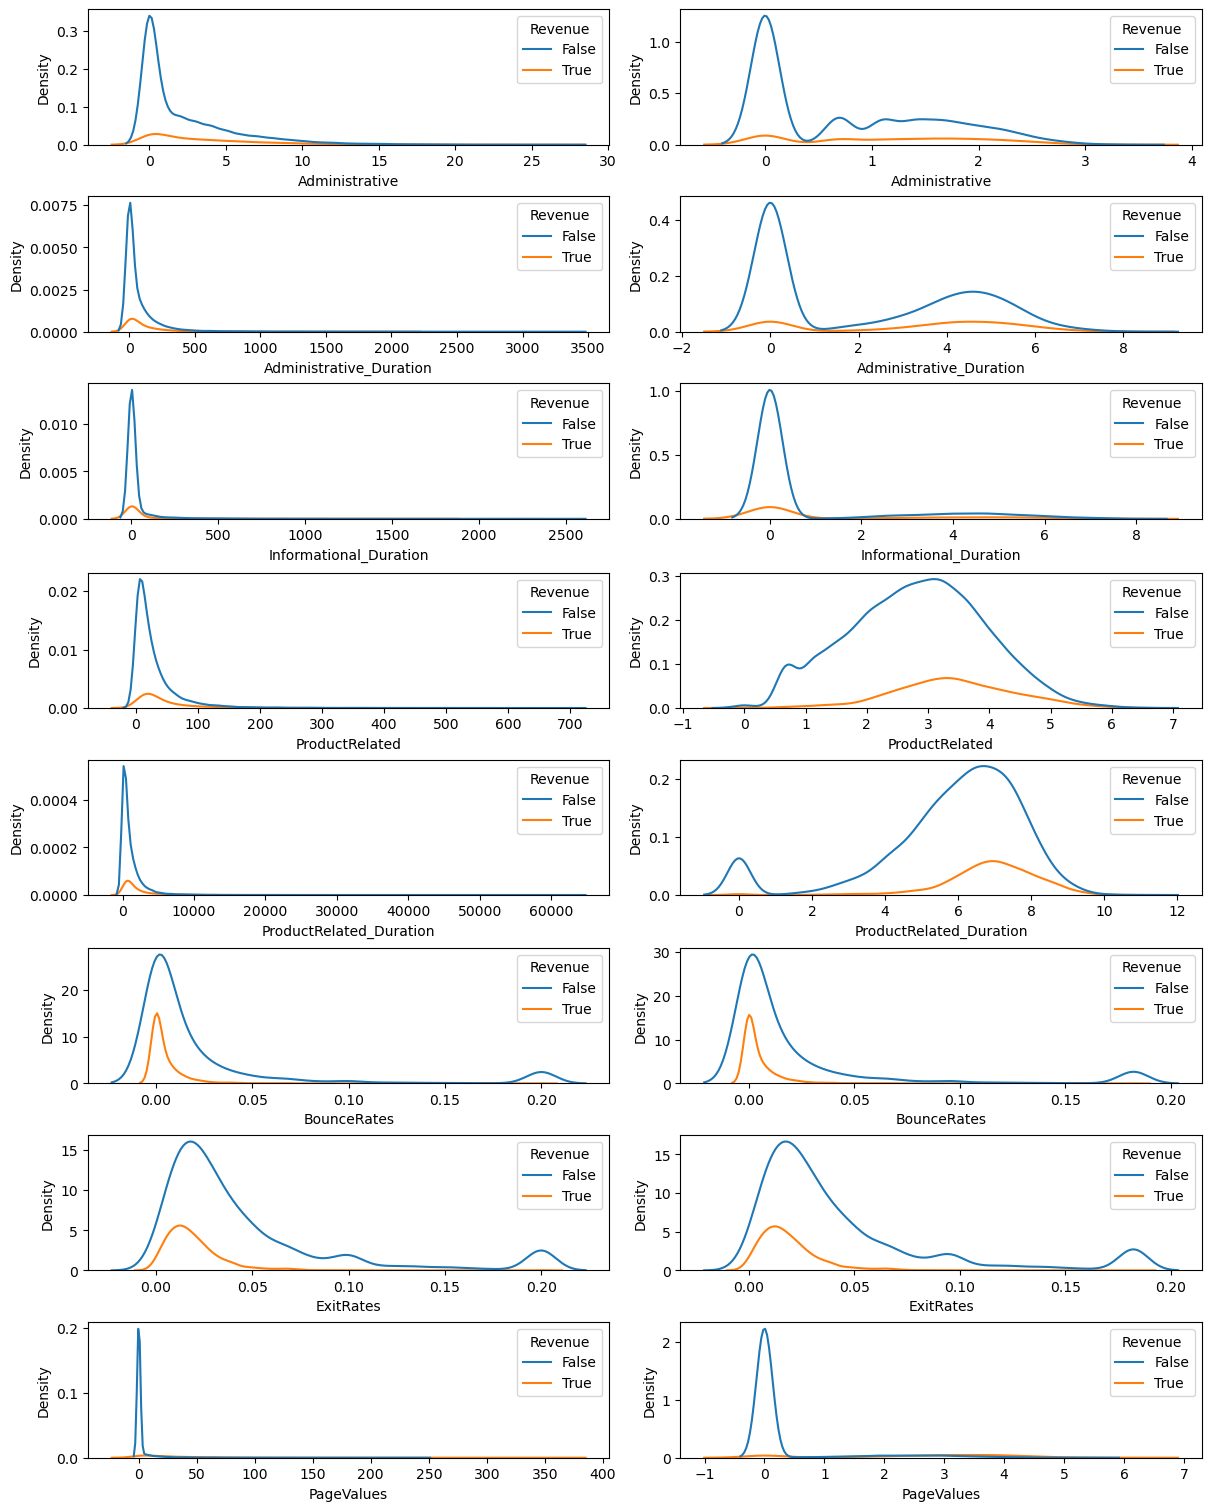

In [17]:
count=0
fig,ax=plt.subplots(len(num),2,constrained_layout=True,figsize=(12,15))
for i in num:
    p=sns.kdeplot(x=df[i],ax=ax[count,0],hue=df['Revenue'])
    sns.kdeplot(x=np.log1p(df[i]),ax=ax[count,1],hue=df['Revenue'])
    p.set(xlabel=i)
    count+=1
    

In [18]:
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [19]:
df['Month']=df['Month'].map({'Jan':0,'Feb':1,'Mar':2,'Apr':3,'May':4,'June':5,'Jul':6,
                'Aug':7,'Sep':8,'Oct':9,'Nov':10,'Dec':11})

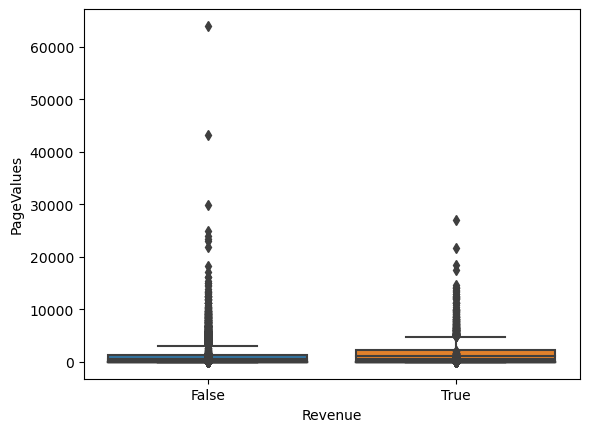

In [57]:
for i in num:
    sns.boxplot(x=df['Revenue'],y=df[i])

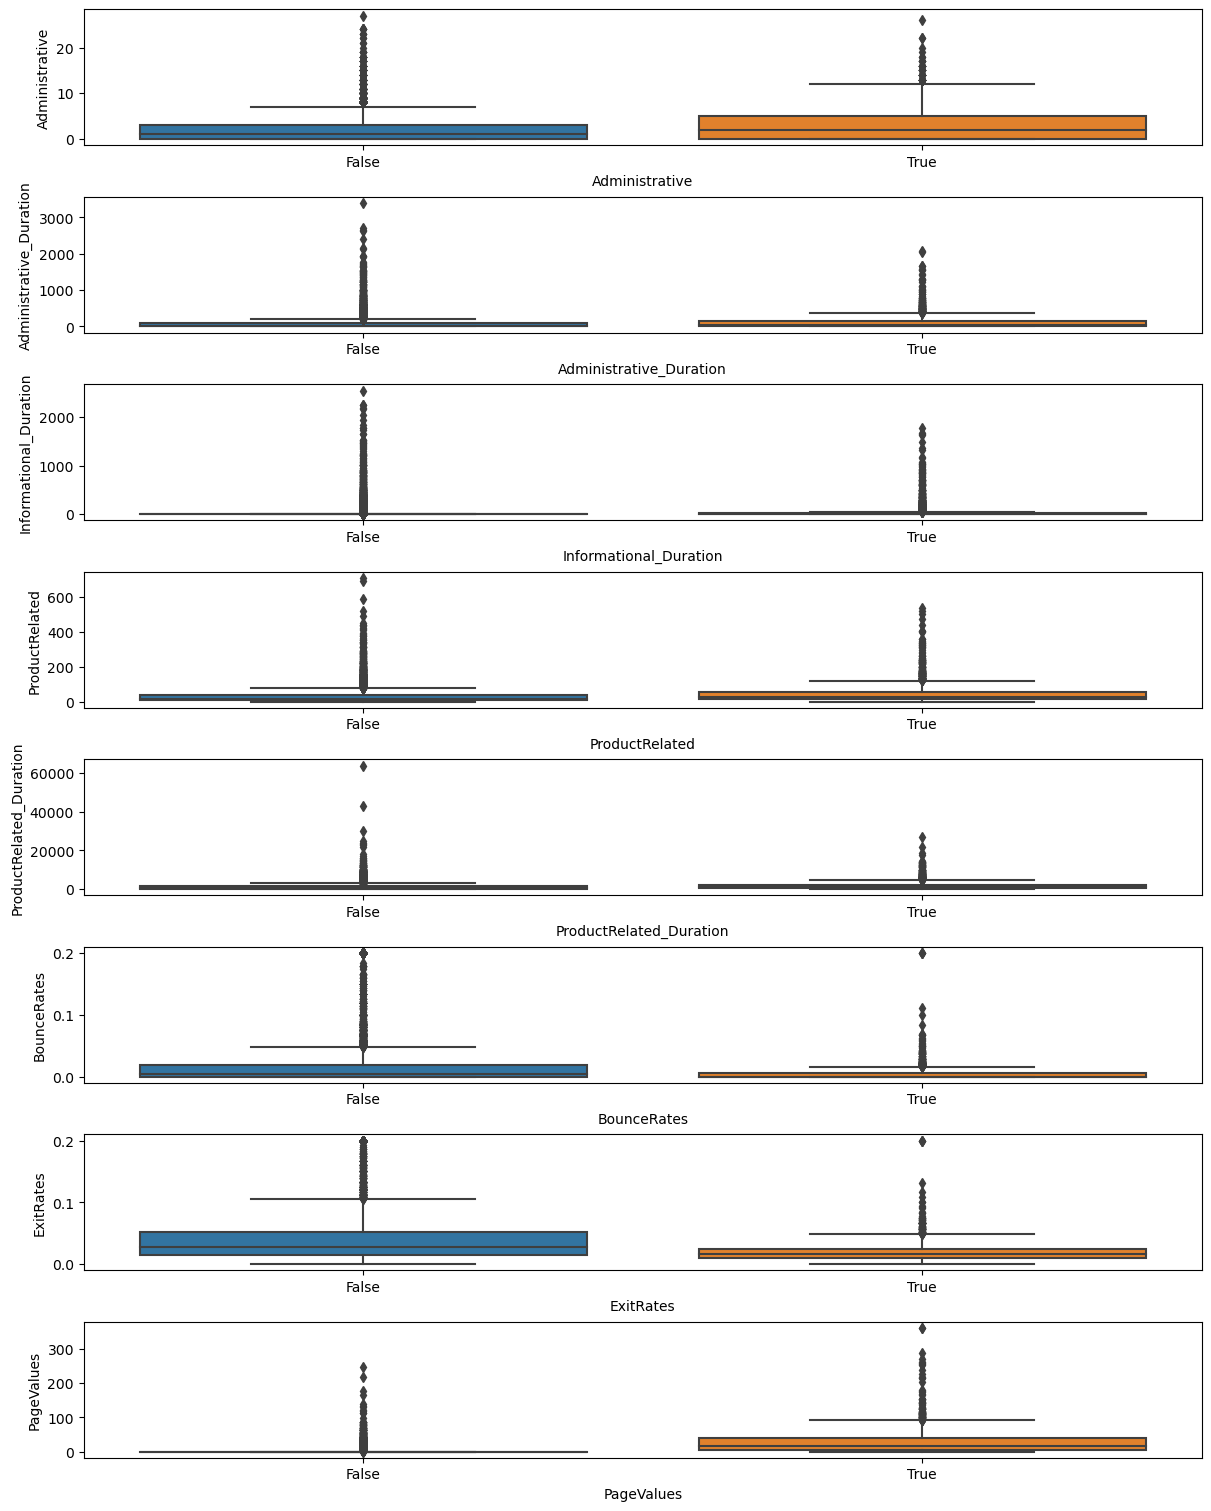

In [58]:
count=0
fig,ax=plt.subplots(len(num),constrained_layout=True,figsize=(12,15))
for i in num:
    p=sns.boxplot(x=df['Revenue'],ax=ax[count],y=df[i])
    p.set(xlabel=i)
    count+=1
    

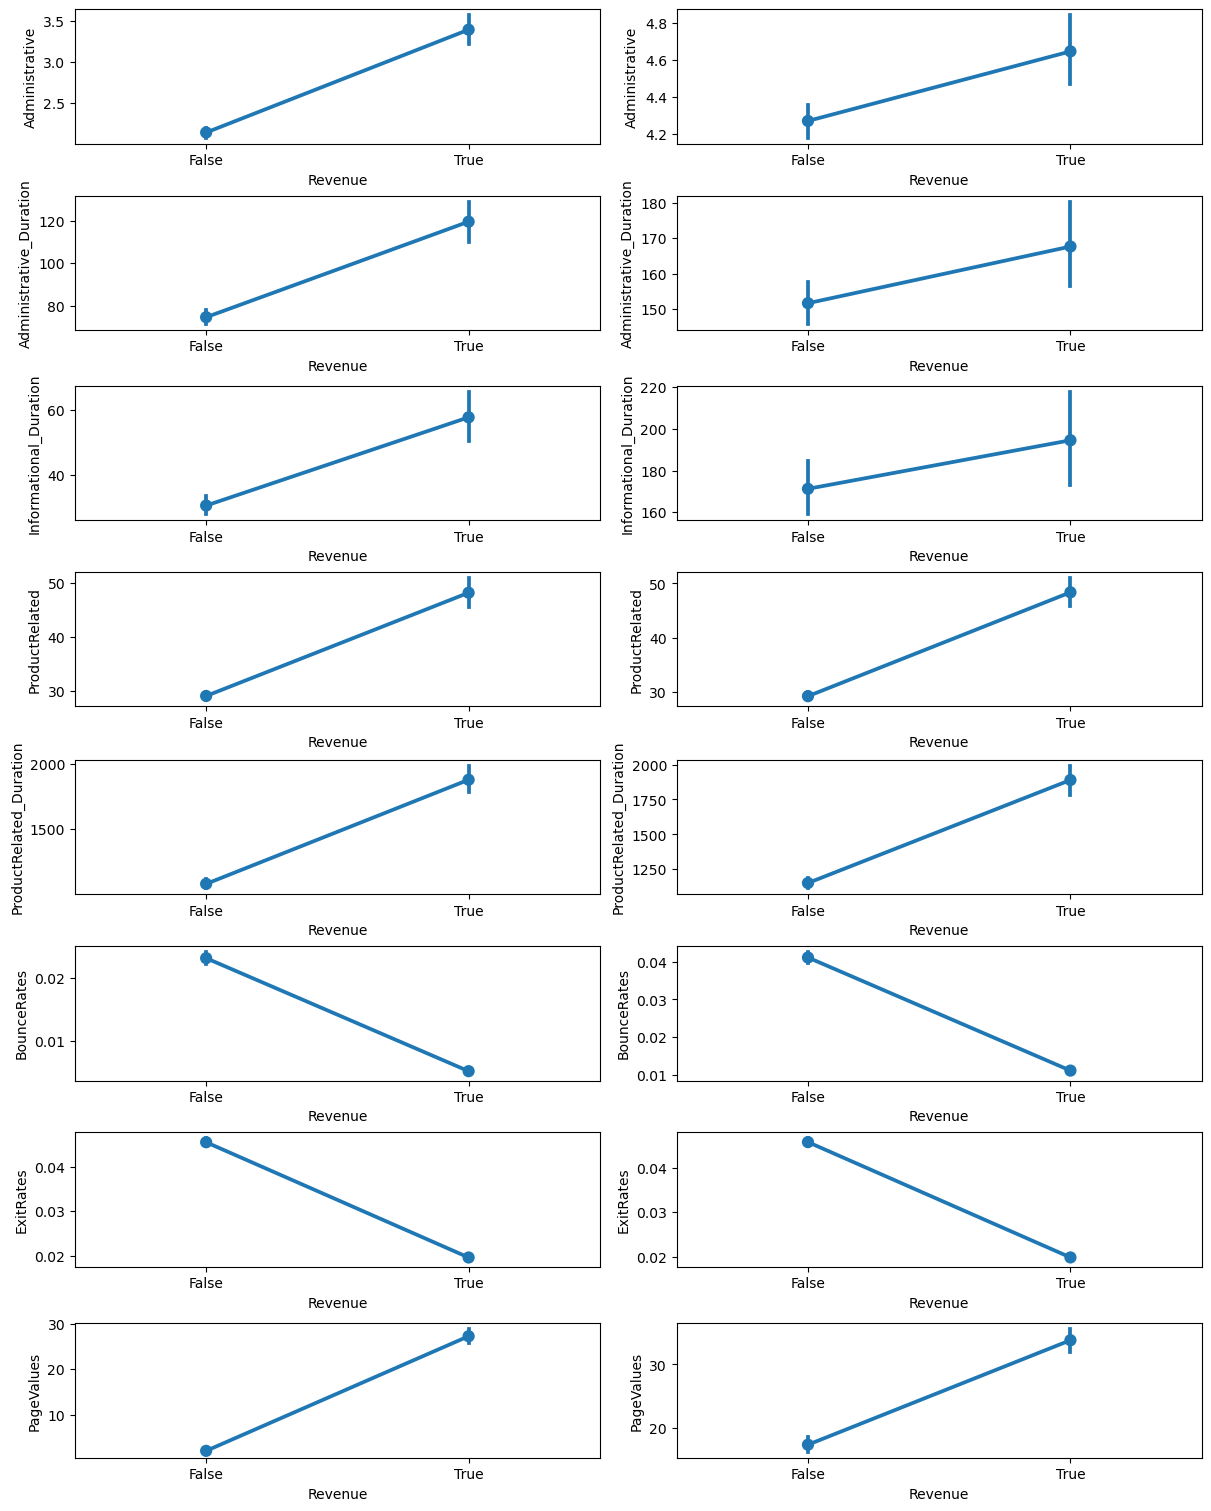

In [21]:
count=0
fig,ax=plt.subplots(len(num),2,constrained_layout=True,figsize=(12,15))
for i in num:
    df2=df[df[i]>0]
    sns.pointplot(y=df[i],x=df['Revenue'],ax=ax[count,0])
    sns.pointplot(y=df2[i],x=df2['Revenue'],ax=ax[count,1])
    count+=1
    

In [22]:
df['VisitorType'].unique()

array([1, 2])

In [23]:
df['Month'].unique()

array([ 1,  2,  4,  9,  5,  6,  7, 10,  8, 11])

In [24]:
df['Month'].value_counts()

4     3329
10    2982
2     1860
11    1706
9      549
8      448
7      433
6      432
5      285
1      181
Name: Month, dtype: int64

In [25]:
df['VisitorType'].value_counts()

1    10431
2     1774
Name: VisitorType, dtype: int64

In [26]:
df['Revenue'].value_counts()

False    10297
True      1908
Name: Revenue, dtype: int64

In [27]:
df['Region'].value_counts()

1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: Region, dtype: int64

In [28]:
df['SpecialDay'].value_counts()

0.0    10956
0.6      350
0.8      324
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [29]:
df['OperatingSystems'].value_counts()

2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

<Axes: xlabel='ExitRates', ylabel='BounceRates'>

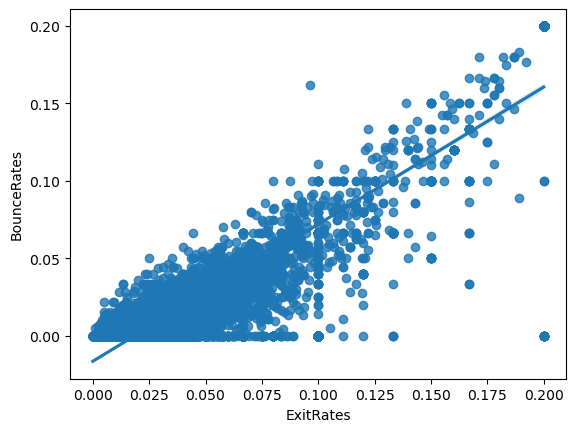

In [30]:
sns.regplot(x=df['ExitRates'],y=df['BounceRates'])

In [31]:
Revenue=df['Revenue']
week=df['Weekend']
inf_D=df['Informational_Duration']

<Axes: >

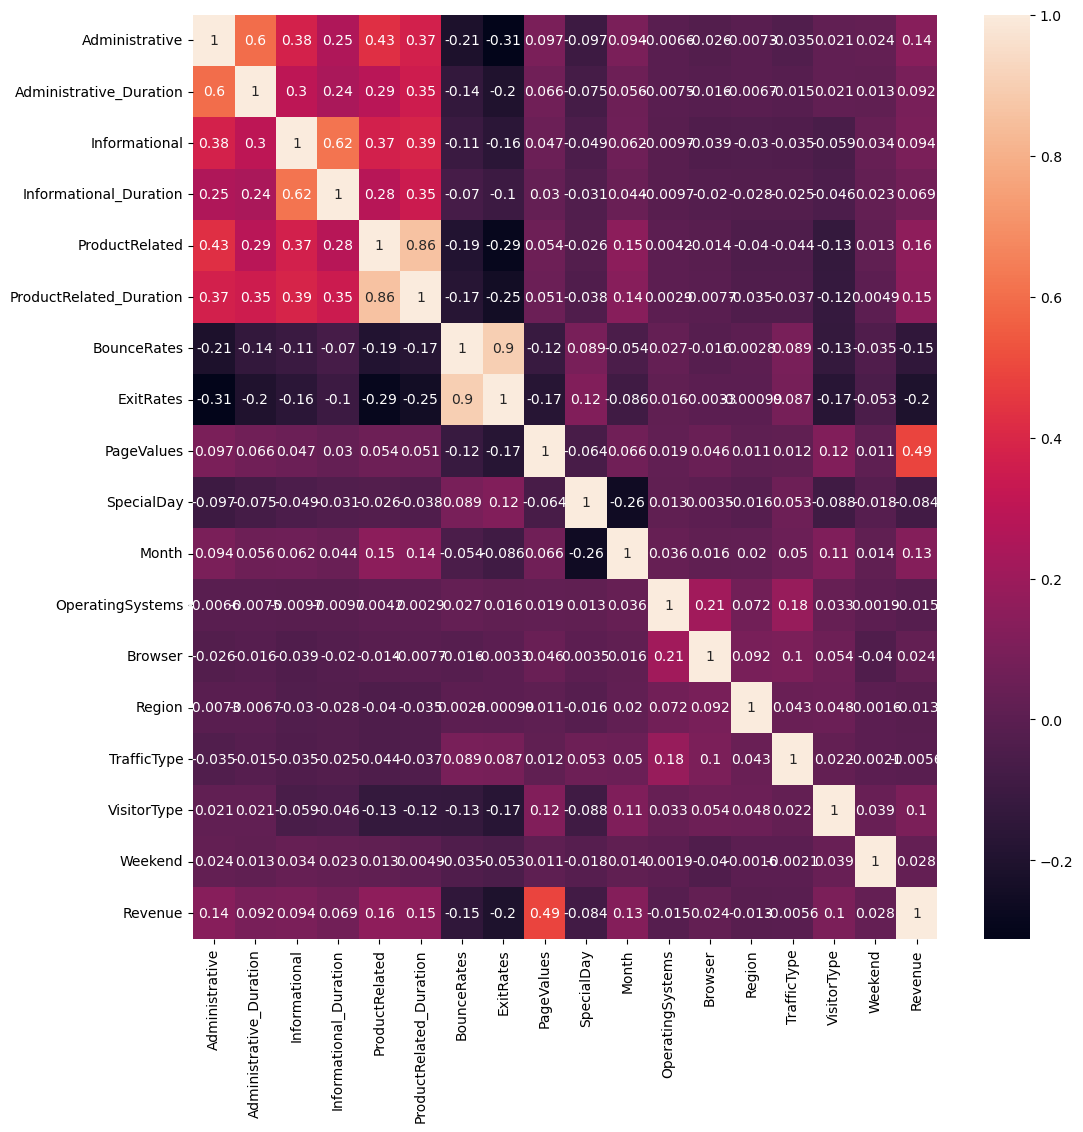

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)


In [33]:
df.Month.unique()

array([ 1,  2,  4,  9,  5,  6,  7, 10,  8, 11])

In [35]:
df_copy=df.drop(['Revenue','ProductRelated','BounceRates','Weekend',
                 'Informational_Duration'],axis=1)
y=df['Revenue']
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df_copy,y,test_size=0.2,random_state=43)
revenue_model = XGBClassifier()
# Add silent=True to avoid printing out updates with each cycle
revenue_model.fit(xtrain, ytrain, verbose=False)
print(revenue_model.score(xtrain,ytrain))
print(revenue_model.score(xtest,ytest))

0.9800286767718148
0.896763621466612


In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest,revenue_model.predict(xtest)))

              precision    recall  f1-score   support

       False       0.93      0.95      0.94      2069
        True       0.68      0.60      0.64       372

    accuracy                           0.90      2441
   macro avg       0.81      0.78      0.79      2441
weighted avg       0.89      0.90      0.89      2441



In [38]:
y=df['Weekend']
xtrain,xtest,ytrain,ytest=train_test_split(df_copy,y,test_size=0.2,random_state=43)
weekend_model = XGBClassifier()
# Add silent=True to avoid printing out updates with each cycle
weekend_model.fit(xtrain, ytrain, verbose=False)
print(weekend_model.score(xtrain,ytrain))
print(weekend_model.score(xtest,ytest))

0.8678820155673904
0.7705858254813601


In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest,weekend_model.predict(xtest)))

              precision    recall  f1-score   support

       False       0.79      0.96      0.87      1886
        True       0.48      0.14      0.21       555

    accuracy                           0.77      2441
   macro avg       0.64      0.55      0.54      2441
weighted avg       0.72      0.77      0.72      2441



In [41]:
from xgboost import XGBRegressor
y=df['Informational_Duration']
xtrain,xtest,ytrain,ytest=train_test_split(df_copy,y,test_size=0.2,random_state=43)
Informational_model = XGBRegressor(max_depth=5,)
# Add silent=True to avoid printing out updates with each cycle
Informational_model.fit(xtrain, ytrain, verbose=False)
print(Informational_model.score(xtrain,ytrain))
print(Informational_model.score(xtest,ytest))

0.8903827278353631
0.3466441948286103


In [45]:
from sklearn.ensemble import RandomForestRegressor
y=df['Informational_Duration']
xtrain,xtest,ytrain,ytest=train_test_split(df_copy,y,test_size=0.2,random_state=43)
Informational_model = RandomForestRegressor(max_depth=5)
# Add silent=True to avoid printing out updates with each cycle
Informational_model.fit(xtrain, ytrain)
print(Informational_model.score(xtrain,ytrain))
print(Informational_model.score(xtest,ytest))

0.493960243205832
0.4170743107147893


In [53]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_scaled = ss.fit_transform(xtrain)
X_test_scaled = ss.transform(xtest)
def hyper_tune(name, clf, parameters, target_names=None): 
    
    target_names = target_names
    clf = clf
    search = GridSearchCV(clf, parameters,verbose=True, n_jobs=15, cv=5)
    search.fit(X_train_scaled,ytrain)
    y_pred_scaled = search.predict(X_test_scaled)
    print ("Accuracy Score = %3.2f" %(search.score(X_test_scaled,ytest)))
    print (search.best_params_)

In [56]:
# Tried HyperParameterTuning
from sklearn.model_selection import GridSearchCV
n_estimators = [100,200]

# Criterion
criterion = ['poisson', 'squared_error']

# Maximum number of levels in tree
max_depth = [10,20]

max_depth.append(None)


# Method of selecting samples for training each tree
bootstrap = [True, False]
# random state

parameters = { 'criterion':criterion,
               'n_estimators': n_estimators,
              'max_depth':max_depth,          
               }


hyper_tune('Random Forest',
           RandomForestRegressor(), parameters)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy Score = 0.41
{'criterion': 'poisson', 'max_depth': 10, 'n_estimators': 100}
